In [19]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms


In [20]:
PATH_CIFAR100 = "datasets/cifar-100-python"
PATH_DATABATCH = [f"{PATH_CIFAR100}/train"]
PATH_TESTBATCH = f"{PATH_CIFAR100}/test"

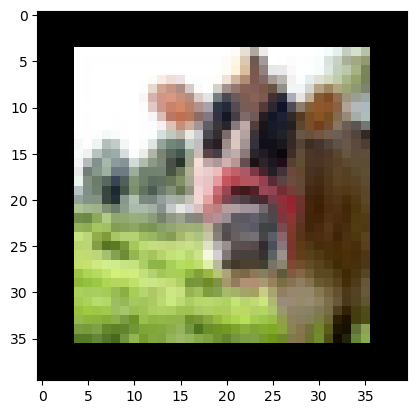

In [26]:
class GPUData:
    def __init__(self):
        self.device = "cuda"
        self.padding = 4
    def cifar100(self):
        # Start by loading the training data
        path_databatch = PATH_DATABATCH
        path_testbatch = PATH_TESTBATCH
        
        with open(path_databatch[0], "rb") as f:
            data = pickle.load(f, encoding="bytes")
            train_x = data[b"data"]
            train_y = data[b"fine_labels"]
        with open(path_testbatch, "rb") as f:
            data = pickle.load(f, encoding="bytes")
            test_x = data[b"data"]
            test_y = data[b"fine_labels"]
        # Establish the transformation
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))
        ])
        
        # Convert the data to tensor and normalize it
        train_x = transform(train_x)
        test_x = transform(test_x)

        # Deflatten the data
        train_x = train_x.view(-1, 3, 32, 32)
        test_x = test_x.view(-1, 3, 32, 32)

        # Add padding if necessary
        train_x = torch.nn.functional.pad(
            train_x, (self.padding, self.padding, self.padding, self.padding))
        test_x = torch.nn.functional.pad(
            test_x, (self.padding, self.padding, self.padding, self.padding))
        
        # Flatten the images back to their original shape
        train_x = train_x.view(train_x.shape[0], -1)
        test_x = test_x.view(test_x.shape[0], -1)
        return self.batching(train_x, train_y, test_x, test_y, batch_size)

g = GPUData()
g.cifar100()
